# Assignment_4_Q1

1) Delivery_time -> Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read data
data=pd.read_csv("C:\Assignment_Excelr\Assignment 4\delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
data.size

42

In [6]:
data.shape

(21, 2)

In [7]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
# Duplicate
data[data.duplicated()]

,delivery_time,sorting_time


In [12]:
data.isna().sum()
data.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [13]:
# Colleration & Visualization
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

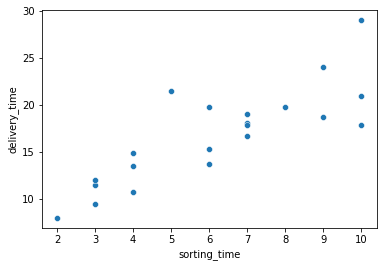

In [14]:
sns.scatterplot(x=data['sorting_time'],y=data['delivery_time'])

array([[<AxesSubplot:title={'center':'delivery_time'}>,
        <AxesSubplot:title={'center':'sorting_time'}>]], dtype=object)

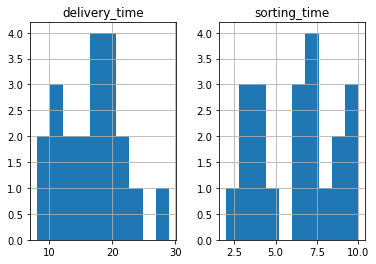

In [15]:
data.hist()

<AxesSubplot:>

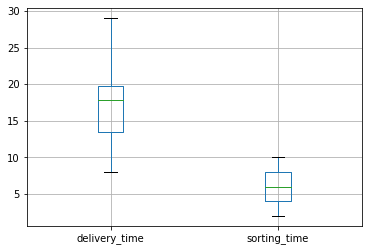

In [16]:
data.boxplot()

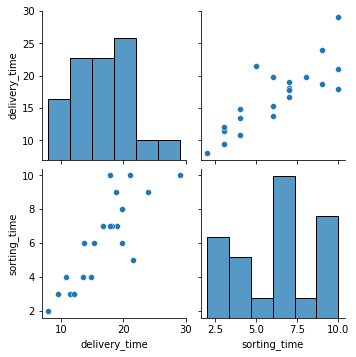

In [17]:
sns.pairplot(data)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

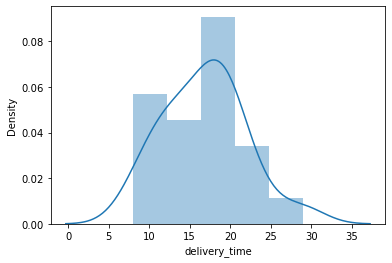

In [18]:
sns.distplot(data['delivery_time'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

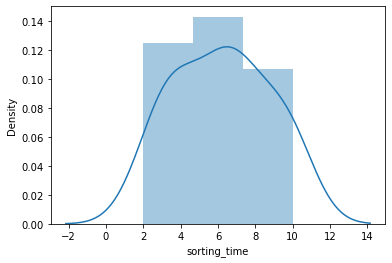

In [19]:
sns.distplot(data['sorting_time'])

In [20]:
y=data[['delivery_time']]

In [21]:
x=data[['sorting_time']]

In [22]:
from sklearn.model_selection import train_test_split

In [404]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [405]:
x_train.head()

,sorting_time
1,4
9,9
17,7
12,7
5,6


In [406]:
x_test.head()

,sorting_time
18,2
20,5
11,4
19,7
13,3


In [407]:
y_train.head()

,delivery_time
1,13.50
9,18.75
17,18.11
12,16.68
5,15.35


In [408]:
y_test.head()

,delivery_time
18,8.00
20,21.50
11,10.75
19,17.83
13,11.50


In [409]:
from sklearn.linear_model import LinearRegression

In [410]:
lr=LinearRegression().fit(x_train,y_train)

In [411]:
lr.predict(x_test)

array([[ 9.67953875],
       [14.71937269],
       [13.03942804],
       [18.07926199],
       [11.35948339],
       [18.07926199],
       [23.11909594]])

In [412]:
y_pred=lr.predict(x_test)

In [413]:
y_test.head()

,delivery_time
18,8.00
20,21.50
11,10.75
19,17.83
13,11.50


In [414]:
y_pred[0:5]

array([[ 9.67953875],
       [14.71937269],
       [13.03942804],
       [18.07926199],
       [11.35948339]])

In [415]:
from sklearn.metrics import mean_squared_error

In [416]:
mse=mean_squared_error(y_test,y_pred)

In [417]:
mse

8.494205768041207

In [418]:
rmse=np.sqrt(mse)

In [419]:
rmse

2.9144820754365957

In [420]:
print(lr.score(x_test,y_test))

0.6670333670281539


In [421]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

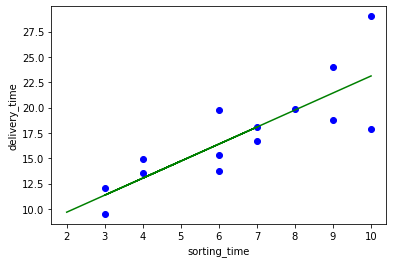

In [422]:
# Visualization for predicted model
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='g')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')
plt.show

In [423]:
# Model_2
# model building using statsmodels

In [424]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [425]:
model=smf.ols("sorting_time ~ delivery_time",data=data).fit()

In [426]:
model

In [427]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        10:04:52   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

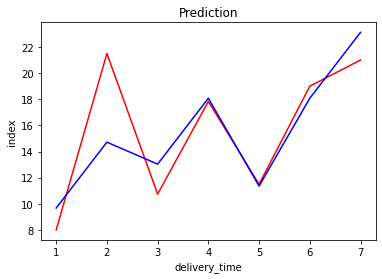

In [428]:
# Plotting the actual vs predicted

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('delivery_time')
plt.ylabel('index')
plt.title('Prediction')
plt.show()